In [2]:
import cv2
import numpy as np
import os
import random
import string

from random import randint
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

Notes for later

Font sizes (64*80)
- 80 (11, -3)
- 85 (11, -5)
- 90 (10, -7)
- 95 (9, -9)
- 100 (7, -12)

In [3]:
LETTER_IMG_DIM_X = 64
LETTER_IMG_DIM_Y = 80
LETTER_IMG_SHAPE = (LETTER_IMG_DIM_Y, LETTER_IMG_DIM_X)

THRESHOLD_MIN = 10
THRESHOLD_MAX = 255

MAX_SHIFT = 3
FONT_SIZES = [80, 85, 90, 95, 100]
FONT_SIZE_LOCATIONS = [(11, -3), (11, -5), (10, -7), (9, -9), (7, -12)]
THRESHOLDS = [1, 64, 128]

# blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
# for i in range(26):
#     letter = chr(ord('A') + i)
#     for j in range(len(FONT_SIZES)):
#         for k in range(len(THRESHOLDS)):
#             blank_letter_pil = Image.fromarray(blank_letter)
#             # Get a drawing context
#             draw = ImageDraw.Draw(blank_letter_pil)
#             shift = random.randint(-MAX_SHIFT, MAX_SHIFT)
#             font_size_index = random.randint(0, len(FONT_SIZES) - 1)
#             font_size = FONT_SIZES[font_size_index]
#             font_location = FONT_SIZE_LOCATIONS[font_size_index]
#             monospace = ImageFont.truetype("C:/Users/alexa/AppData/Local/Microsoft/Windows/Fonts/UbuntuMono-R.ttf", 
#                                             font_size)
#             draw.text(font_location, letter, fill=255, font=monospace)
#             # Convert back to OpenCV image and save
#             letter_img = np.array(blank_letter_pil)
#             letter_img_thresh = cv2.inRange(letter_img, 64, 255)
#             cv2.imwrite(os.path.join("train-letters/", letter + "/", 
#                                  letter + str(j * len(THRESHOLDS) + k) + ".png"), letter_img_thresh)

In [ ]:
os.mkdir('train-letters')

Demonstration: first draw ideal letters: size 90, threshold 64 (medium), centered and straight. See how that performs against actual SIFT images.

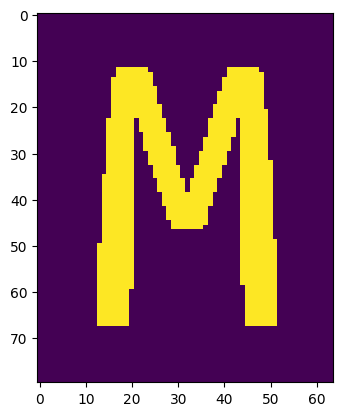

In [6]:
# Demonstration: generate ideal letter templates (font size 90, place (10, -7)). 
# Thresholding idk, maybe target middle (64) or use 'blur' of all values (no threshold -- so 64)
letter = 'M'
blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
blank_letter_pil = Image.fromarray(blank_letter)
# Get a drawing context
draw = ImageDraw.Draw(blank_letter_pil)
font_size = 90
font_location = (10, -7)
monospace = ImageFont.truetype("C:/Users/alexa/AppData/Local/Microsoft/Windows/Fonts/UbuntuMono-R.ttf", 
                                font_size)
draw.text(font_location, letter, fill=255, font=monospace)
# Convert back to OpenCV image and save
letter_img = np.array(blank_letter_pil)
letter_img_thresh = cv2.inRange(letter_img, 64, 255)
cv2.imwrite(os.path.join("train-letters", "testLetter.png"), letter_img_thresh)
plt.imshow(letter_img_thresh)

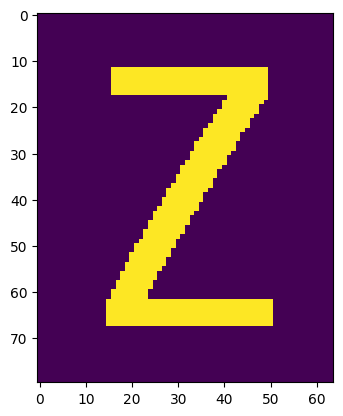

In [7]:
for i in range(26):
    # Demonstration: generate ideal letter templates (font size 90, place (10, -7))
    letter = chr(ord('A') + i)
    blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
    blank_letter_pil = Image.fromarray(blank_letter)
    # Get a drawing context
    draw = ImageDraw.Draw(blank_letter_pil)
    font_size = 90
    font_location = (10, -7)
    monospace = ImageFont.truetype("C:/Users/alexa/AppData/Local/Microsoft/Windows/Fonts/UbuntuMono-R.ttf", 
                                    font_size)
    draw.text(font_location, letter, fill=255, font=monospace)
    # Convert back to OpenCV image and save
    letter_img = np.array(blank_letter_pil)
    letter_img_thresh = cv2.inRange(letter_img, 64, 255)
    cv2.imwrite(os.path.join("train-letters/", f"testLetter_{i}.png"), letter_img_thresh)
    plt.imshow(letter_img_thresh)

In [37]:
# Delete the 'train-letters' directory before running.
os.mkdir('train-letters/')
for i in range(26):
    letter = chr(ord('A') + i)
    os.mkdir('train-letters/' + str(i))
    for j in range(len(FONT_SIZES)):
        # Demonstration: generate ideal letter templates (font size 90, place (10, -7))
        blank_letter = np.zeros(LETTER_IMG_SHAPE, dtype=np.uint8)
        blank_letter_pil = Image.fromarray(blank_letter)
        # Get a drawing context
        draw = ImageDraw.Draw(blank_letter_pil)
        font_size = FONT_SIZES[j]
        font_location = FONT_SIZE_LOCATIONS[j]
        monospace = ImageFont.truetype("C:/Users/alexa/AppData/Local/Microsoft/Windows/Fonts/UbuntuMono-R.ttf", 
                                        font_size)
        draw.text(font_location, letter, fill=255, font=monospace)
        # Convert back to OpenCV image and save
        letter_img = np.array(blank_letter_pil)
        letter_img_thresh = cv2.inRange(letter_img, 64, 255)
        cv2.imwrite(os.path.join("train-letters", str(i), f"{letter}_{font_size}.png"), letter_img_thresh)

In [36]:
val = [0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]
len(val)

26